# Linear Regression

## 1) What is Regression?

We still will have: X and y
What changes: y, the variable that we are trying to predict, is a quantitative value.

What is y this week? --> The amount of bike rentals (count)

In classification, y was categorical.

## 2) What is Linear Regression?

Linear regression models the relationship between X and y as linear.

### 2.1) The Anscombe example

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

ansc = sns.load_dataset("anscombe")
ansc.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [2]:
# Let's check out how many datasets we have in the ansc DataFrame
ansc['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

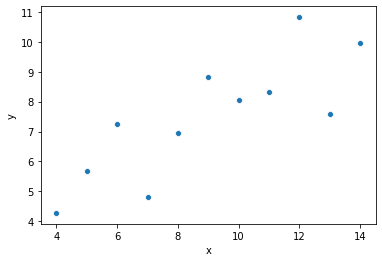

In [3]:
# Plot the data
sns.scatterplot(data=ansc[ansc['dataset']=='I'], x='x', y='y')

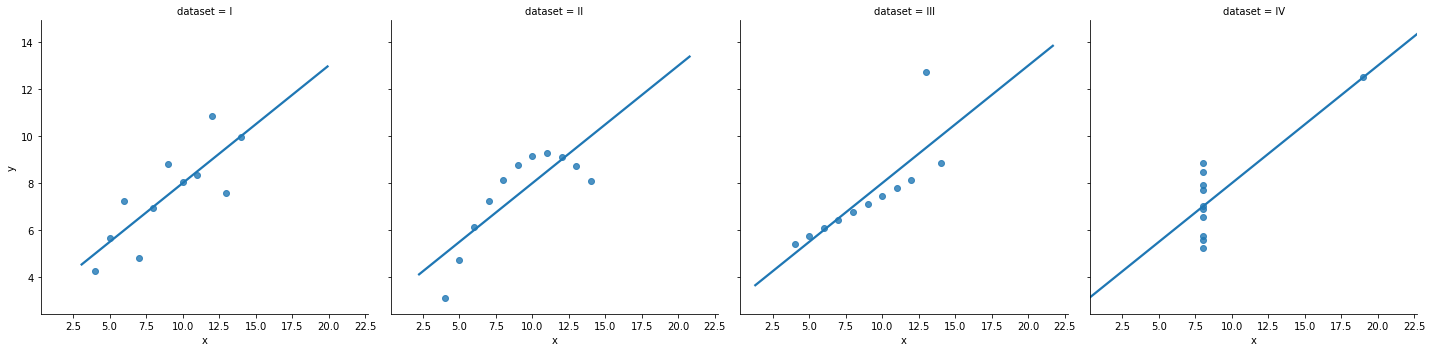

In [4]:
sns.lmplot(data=ansc, x='x', y='y', col='dataset', ci=None)

It seems like the plotted line does not make equally sense for all of the datasets.

I: Seems to work fine

II: Does not look like a linear relationship but rather like a squared relationship. We will learn methods tomorrow on how to deal with these kind of situations.

III: It seems like there is a perfectly linear relationship between x and y except for one datapoint. This datapoint has a significant impact on the resulting line. Linear regression is sensible to outliers.

IV: x only takes on two values and for one of those values the variation in y is quite high. We need variation in x in order for the model to be able to make sense.

Our model kind of assumes that given X (the input features) y is deterministic.

### 2.2) The formula

$$
\hat{y} = w_0 + w_1 * x
$$

where $\hat{y}$ is the models prediction of outcome y at point x.<br>
$w_0$ and $w_1$ are called coefficients. $w_0$ is the **intercept** of the line and $w_1$ is the **slope** of the line.

### 2.3) How do we determine $w_0$ and $w_1$?

- We use the training data to determine them.

#### 2.3.1) We need a loss function

The loss function of linear regression is the MSE (Mean Squared Error).

$$
MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2
$$

The task of the model is to minimize this MSE. This can be achieved in one of two ways.

#### We have to calculate/estimate the coefficients

1. Mathematically: Take the derivatives of the MSE with respect to the coefficients and set the derivatives to zero. The outcomes will be:

$$
w_0 = \overline{y} - w_1 * \overline{x}
$$

$$
w_1 = \frac{\sum_{i=1}^n(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n(x_i - \overline{x})^2}
$$

2. Algorithmically: You will learn about Gradient Descent tomorrow.

### 2.4) Interpretation of the parameters $w_0$ and $w_1$

### 2.5) Multiple Linear Regression

Multivariate Linear Regression describes the case in which we have more than one input feature. We can have multiple ones.

With two input features for example the formula would just change to

$$
\hat{y} = w_0 + w_1 * x_1 + w_2 * x_2
$$

and we would now fit a plane (the 3D equivalent of a line) to the data.

## 3) Implementation in code

### Example: The penguins are back!

In [5]:
df = pd.read_csv('all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)
df.shape

(334, 14)

In [6]:
df.head()

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE
PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,A_5,MALE


### Let's try to predict Culmen Depth from Culmen Length

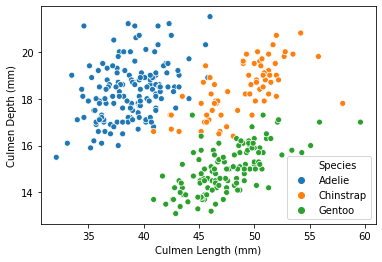

In [7]:
# Make a plot for all species
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)'
                , hue='Species')

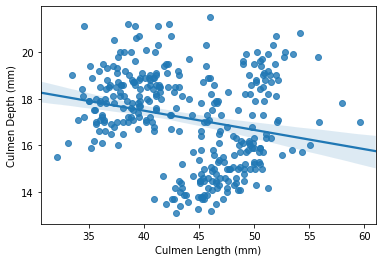

In [8]:
sns.regplot(x='Culmen Length (mm)', y='Culmen Depth (mm)', data=df)

In [9]:
# Choose one of the species
gentoo = (df[df['Species']=='Gentoo'])

In [10]:
type(gentoo)

pandas.core.frame.DataFrame

In [11]:
# Define the variable of interest y and the input feature X
X = gentoo[['Culmen Length (mm)']]
y = gentoo['Culmen Depth (mm)']

# Linear Regression with scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Split the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
X_train.shape, y_train.shape

((90, 1), (90,))

## EDA

- Task for the rest of the day

## Feature Engineering

- You can start with this today using the methods you already know
- Tomorrow you have an additional lecture on feature engineering

## Fit the model

In [15]:
# Create the model
m = LinearRegression(normalize=True)

In [16]:
# Fit the model
m.fit(X_train, y_train)

LinearRegression(normalize=True)

In [17]:
m.coef_

array([0.18201236])

In [18]:
# Coefficients
w_0 = m.intercept_
w_1 = m.coef_[0]

In [19]:
# Interpretation of w_0
w_0

6.3894191637346545

If the culmen length of a penguin was 0 mm, the expected culmen depth would be 6.39 mm.

--> In this case it does not make to much sense

In [20]:
# Interpretation of w_1
w_1

0.18201235572769373

w_1 tells you, by how many mm Culmen Depth increases if Culmen Length increases by 1 mm (on average).

The increase in y if x increases by 1.

## Evaluate/Optimize the model

- What kind of evaluation metrics can we use?
    - MSE
    - RMSLE
    - R-squared (coefficient of determination)
- You should do cross-validation (on your own)

In [21]:
# Look at the training score
m.score(X_train, y_train) # R-squared

0.3540804280836197

**R-squared**

$$
R^2 = 1 - \frac{SSR}{SST} = 
      1- \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \overline{y})2}
$$

It gives you an indication of how good your model is compared to just predicting the mean value.

Can be interpreted as the **ratio of variance in y explained by the model**.

A high value is better! It is bounded between 0 and 1.

One mathematical artefact of the R-squared is that it necessarily increases with the number of features that we use in our model (in the training sample). This problem can be solved by using something called Adjusted R-squared.

In [22]:
# Make predictions for the training data
y_pred_train = m.predict(X_train)

//anaconda3/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
//anaconda3/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


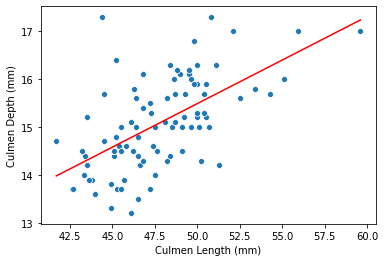

In [23]:
# Plot the training data and the predictions for the training data
sns.scatterplot(x=X_train['Culmen Length (mm)'], y=y_train)
sns.lineplot(x=X_train['Culmen Length (mm)'], y=y_pred_train, c='r')

## Test your model

In [24]:
m.score(X_test, y_test)

0.5191346282351066

//anaconda3/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
//anaconda3/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


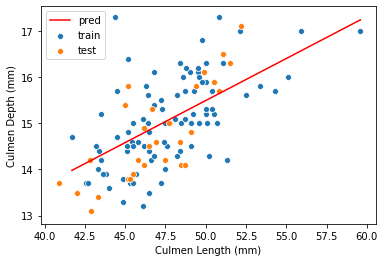

In [25]:
# Plot the training data and the predictions for the training data
sns.scatterplot(x=X_train['Culmen Length (mm)'], y=y_train, label='train')
sns.scatterplot(x=X_test['Culmen Length (mm)'], y=y_test, label='test')
sns.lineplot(x=X_train['Culmen Length (mm)'], y=y_pred_train, c='r', label='pred')
plt.legend()